In [144]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ratings = pd.read_csv("ratings.csv")
tr = pd.read_csv("to_read.csv")
books = pd.read_csv("books.csv")


In [145]:
tags = pd.read_csv("tags.csv")
book_tags = pd.read_csv("book_tags.csv")

In [146]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


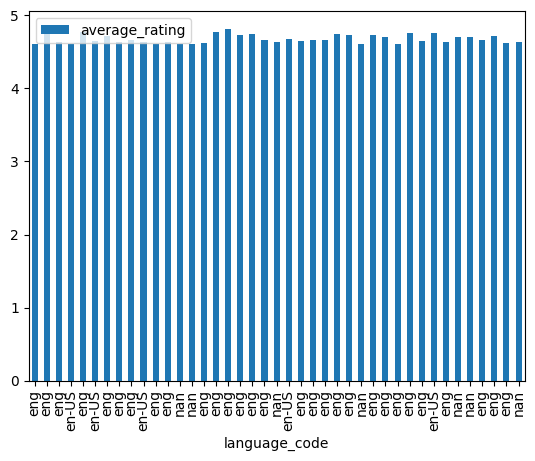

In [147]:
avg_4 = books.query("average_rating > 4.6")
avg_4.plot(kind = "bar", x = "language_code", y = "average_rating")
plt.show()

In [148]:
#r.rating.hist(bins = 5)

In [149]:
selected_columns = ["book_id", "authors", "original_publication_year", "original_title", "language_code", "average_rating", "ratings_count"]
books_df = books[selected_columns].copy()

In [150]:
books_df.isnull().values.any()

True

In [151]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   authors                    10000 non-null  object 
 2   original_publication_year  9979 non-null   float64
 3   original_title             9415 non-null   object 
 4   language_code              8916 non-null   object 
 5   average_rating             10000 non-null  float64
 6   ratings_count              10000 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [152]:
books_df.average_rating.unique()

array([4.34, 4.44, 3.57, 4.25, 3.89, 4.26, 3.79, 3.85, 4.24, 4.14, 3.87,
       4.1 , 4.11, 4.3 , 4.53, 4.03, 4.46, 3.77, 4.37, 4.61, 4.54, 3.64,
       3.73, 4.45, 3.84, 4.08, 3.67, 3.82, 4.12, 4.19, 3.95, 3.51, 4.23,
       4.04, 4.06, 3.88, 4.07, 4.36, 3.97, 3.52, 4.29, 3.69, 3.86, 4.2 ,
       3.7 , 4.01, 3.8 , 4.15, 3.94, 4.28, 4.21, 3.75, 4.17, 4.09, 3.93,
       3.81, 3.96, 4.38, 4.02, 3.98, 4.22, 3.63, 3.61, 4.4 , 4.27, 3.9 ,
       3.99, 4.  , 3.92, 4.18, 3.37, 4.39, 4.31, 4.16, 4.42, 3.83, 4.51,
       4.35, 3.68, 3.6 , 3.74, 4.5 , 4.05, 3.76, 4.33, 4.47, 4.55, 3.46,
       3.66, 3.78, 3.4 , 4.13, 4.43, 3.72, 3.42, 3.62, 3.91, 4.57, 3.28,
       3.55, 3.59, 4.74, 4.59, 4.48, 4.49, 3.31, 3.65, 4.64, 3.47, 4.32,
       3.56, 3.48, 3.71, 3.49, 3.41, 3.29, 4.77, 3.33, 3.22, 3.54, 4.65,
       4.41, 3.45, 3.43, 4.6 , 3.3 , 4.72, 3.5 , 3.58, 2.97, 3.32, 3.39,
       3.53, 3.23, 4.56, 3.21, 3.1 , 3.35, 3.25, 4.63, 2.47, 3.07, 3.36,
       3.14, 3.18, 3.34, 3.11, 4.52, 4.66, 4.58, 3.

In [153]:
books_df.describe()

,book_id,original_publication_year,average_rating,ratings_count
count,10000.00000,9979.000000,10000.000000,1.000000e+04
mean,5000.50000,1981.987674,4.002191,5.400124e+04
std,2886.89568,152.576665,0.254427,1.573700e+05
min,1.00000,-1750.000000,2.470000,2.716000e+03
25%,2500.75000,1990.000000,3.850000,1.356875e+04
50%,5000.50000,2004.000000,4.020000,2.115550e+04
75%,7500.25000,2011.000000,4.180000,4.105350e+04
max,10000.00000,2017.000000,4.820000,4.780653e+06


In [154]:
pd.set_option("display.max_rows", 10)
a = books_df.sort_values(by = "original_publication_year")
print(a.original_publication_year)

2075   -1750.0
2141    -762.0
340     -750.0
6165    -750.0
78      -720.0
         ...  
8476       NaN
9196       NaN
9510       NaN
9533       NaN
9928       NaN
Name: original_publication_year, Length: 10000, dtype: float64


In [155]:
#Cleaning the data

#Removing rows with empty cells
books_df = books_df.dropna()
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8405 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    8405 non-null   int64  
 1   authors                    8405 non-null   object 
 2   original_publication_year  8405 non-null   float64
 3   original_title             8405 non-null   object 
 4   language_code              8405 non-null   object 
 5   average_rating             8405 non-null   float64
 6   ratings_count              8405 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 525.3+ KB


In [156]:
books_df.isnull().values.any()

False

In [157]:
books_df = books_df.replace(to_replace=["en-US", "en-CA", "en-GB"], value = "eng")
books_df = books_df.replace(to_replace=["J.K. Rowling, Mary GrandPrÃ©", "J.K. Rowling, Mary GrandPrÃ©, Rufus Beck", "J.K. Rowling, Mary GrandPré", "J.K. Rowling, Mary GrandPré, Rufus Beck"], value = "J.K. Rowling")
books_df = books_df.replace(to_replace = "William Shakespeare, Robert           Jackson", value="William Shakespeare")

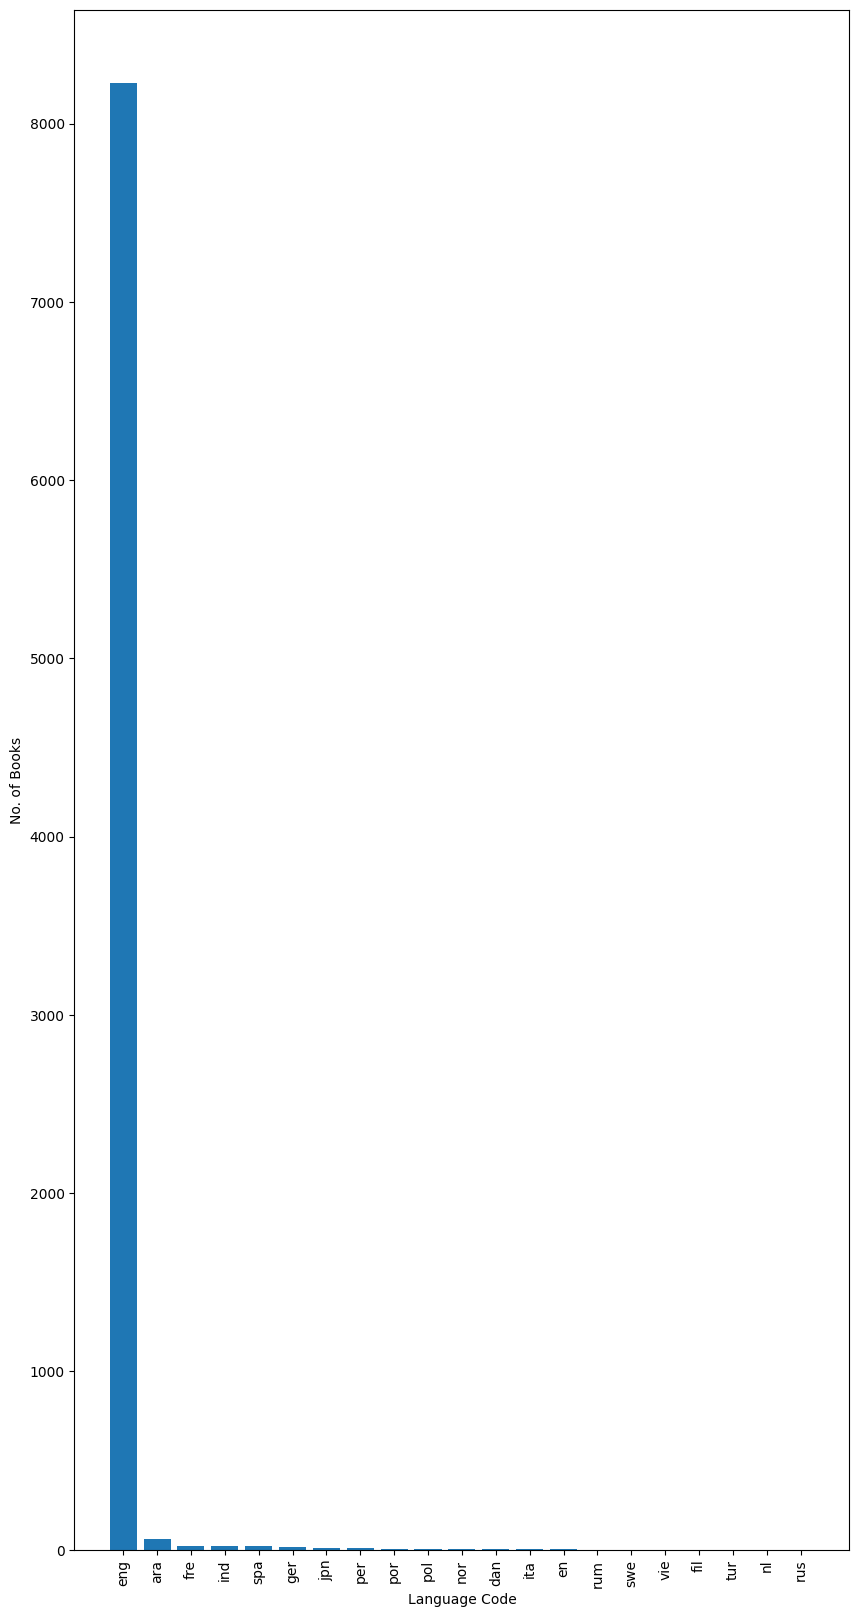

In [231]:
# books_df["language_code"].plot(kind = "hist")
# plt.show()

count = books_df["language_code"].value_counts()

plt.figure(figsize=(10,20))

plt.bar(count.index, count)
plt.xticks(rotation = 90)
plt.xlabel("Language Code")
plt.ylabel("No. of Books")
plt.show()


After counting the number of books present in various languages in the given dataset of 10,000 books, books in english heavily outnumber books in other languages. This clearly shows that goodrweads being an american company has majority of its readers from english speaking countries. 

In [159]:
books_df.describe()

,book_id,original_publication_year,average_rating,ratings_count
count,8405.000000,8405.000000,8405.000000,8.405000e+03
mean,4792.274955,1981.731469,3.998337,5.930397e+04
std,2887.497909,157.358507,0.251581,1.699479e+05
min,1.000000,-1750.000000,2.470000,2.716000e+03
25%,2263.000000,1990.000000,3.850000,1.415700e+04
50%,4692.000000,2004.000000,4.010000,2.262000e+04
75%,7270.000000,2011.000000,4.170000,4.508900e+04
max,9999.000000,2017.000000,4.820000,4.780653e+06


In [160]:
print(count)

eng    8227
ara      58
fre      23
ind      21
spa      20
       ... 
vie       1
fil       1
tur       1
nl        1
rus       1
Name: language_code, Length: 21, dtype: int64


[]

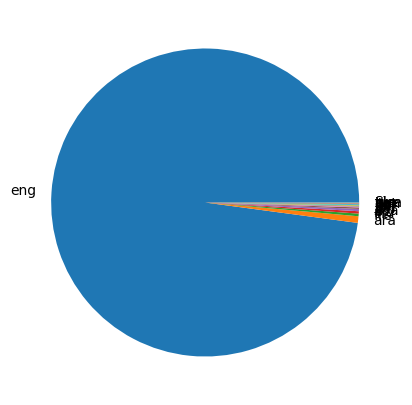

In [161]:

plt.figure(figsize=(5,5))

plt.pie(count, labels = count.index)
plt.plot()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'eng'),
  Text(1, 0, 'ara'),
  Text(2, 0, 'fre'),
  Text(3, 0, 'ind'),
  Text(4, 0, 'spa'),
  Text(5, 0, 'ger'),
  Text(6, 0, 'jpn'),
  Text(7, 0, 'per'),
  Text(8, 0, 'por'),
  Text(9, 0, 'pol'),
  Text(10, 0, 'nor'),
  Text(11, 0, 'dan'),
  Text(12, 0, 'ita'),
  Text(13, 0, 'en'),
  Text(14, 0, 'rum'),
  Text(15, 0, 'swe'),
  Text(16, 0, 'vie'),
  Text(17, 0, 'fil'),
  Text(18, 0, 'tur'),
  Text(19, 0, 'nl'),
  Text(20, 0, 'rus')])

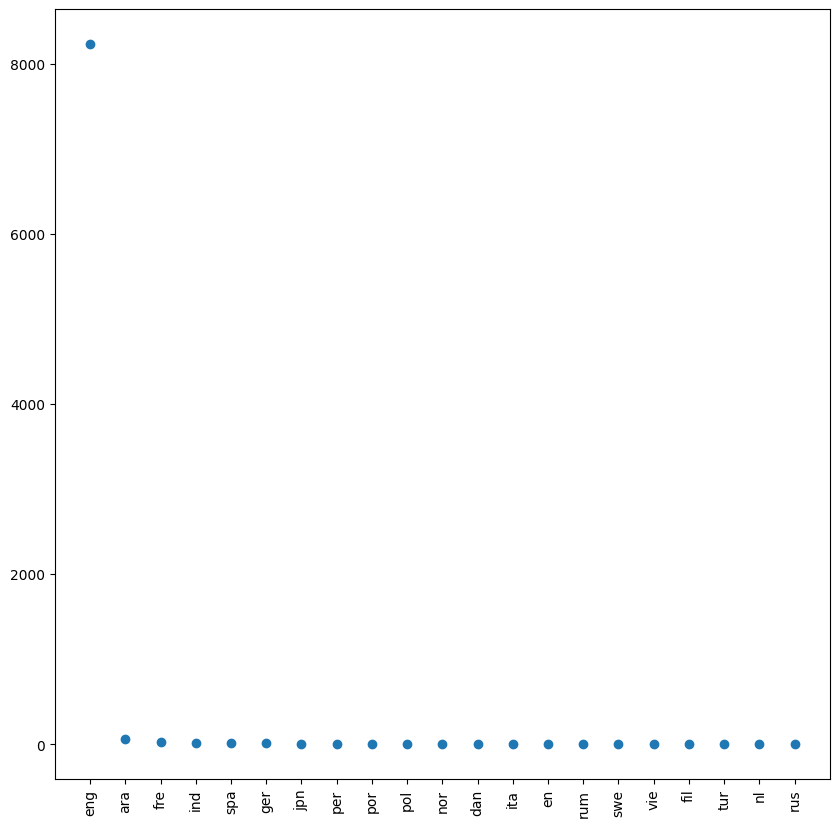

In [162]:
plt.figure(figsize=(10,10))

plt.scatter(count.index, count)
plt.xticks(rotation = 90)

eng    8227
ara      58
fre      23
ind      21
spa      20
       ... 
vie       1
fil       1
tur       1
nl        1
rus       1
Name: language_code, Length: 21, dtype: int64


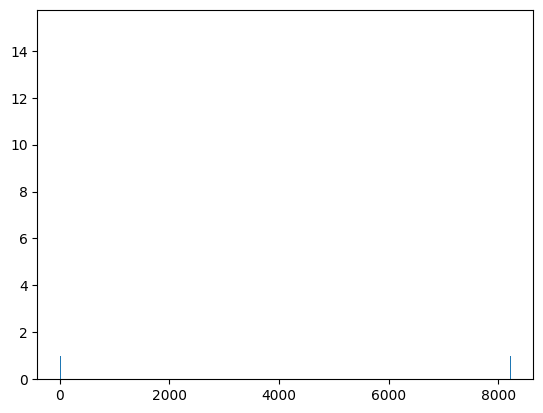

In [163]:
pop_stars_df = books_df.query("average_rating > 4.5")
#pop_ratings_df = books_df.query("ratings_count > 500000")

count1 = books_df["language_code"].value_counts()

print(count1)
plt.hist(count1, bins=1000)
plt.show()

# pop_stars_df["language_code"].plot(kind = "hist", bins=100)

In [182]:
pop_ratings_df = books_df.query("ratings_count > 1500000")
pop_ratings_df = pop_ratings_df.replace(to_replace=["J.K. Rowling, Mary GrandPrÃ©", "J.K. Rowling, Mary GrandPrÃ©, Rufus Beck", "J.K. Rowling, Mary GrandPré", "J.K. Rowling, Mary GrandPré, Rufus Beck"], value = "J.K. Rowling")

print(pop_ratings_df)

    book_id                                            authors  \
0         1                                    Suzanne Collins   
1         2                                       J.K. Rowling   
2         3                                    Stephenie Meyer   
3         4                                         Harper Lee   
4         5                                F. Scott Fitzgerald   
5         6                                         John Green   
6         7                                     J.R.R. Tolkien   
7         8                                      J.D. Salinger   
8         9                                          Dan Brown   
9        10                                        Jane Austen   
10       11                                    Khaled Hosseini   
11       12                                      Veronica Roth   
12       13            George Orwell, Erich Fromm, Celâl Üster   
13       14                                      George Orwell   
14       1

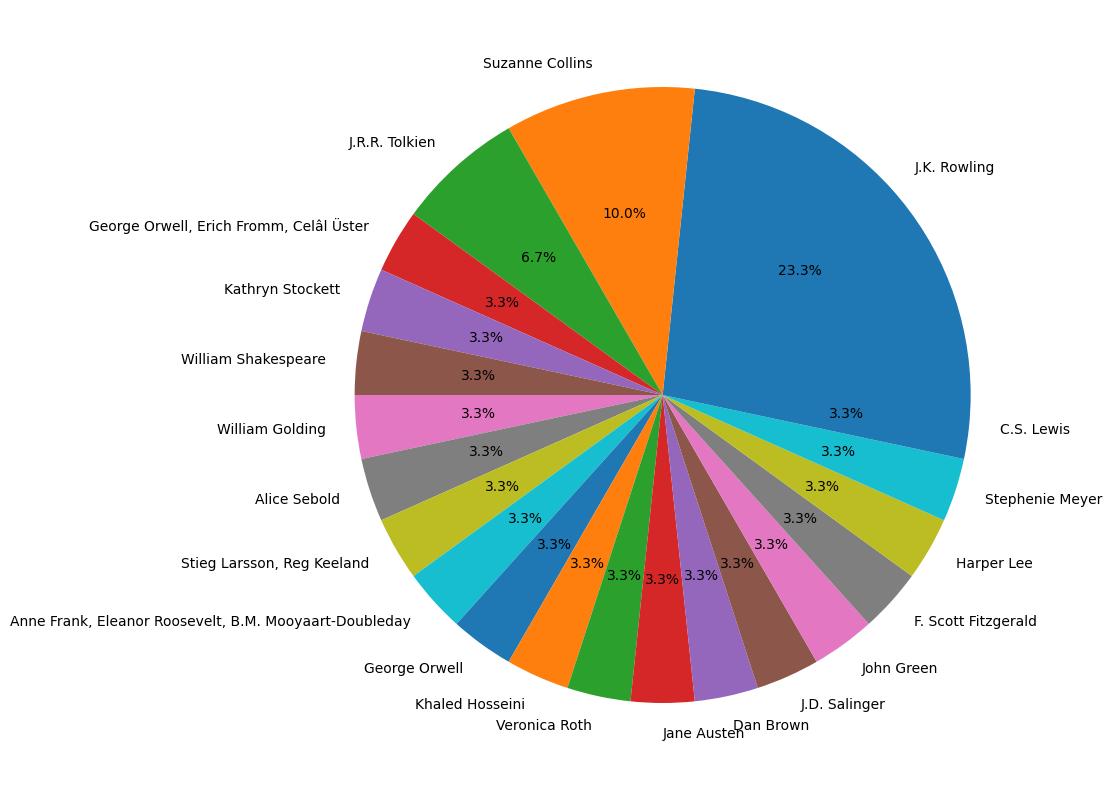

    book_id                                            authors  \
0         1                                    Suzanne Collins   
1         2                                       J.K. Rowling   
2         3                                    Stephenie Meyer   
3         4                                         Harper Lee   
4         5                                F. Scott Fitzgerald   
5         6                                         John Green   
6         7                                     J.R.R. Tolkien   
7         8                                      J.D. Salinger   
8         9                                          Dan Brown   
9        10                                        Jane Austen   
10       11                                    Khaled Hosseini   
11       12                                      Veronica Roth   
12       13            George Orwell, Erich Fromm, Celâl Üster   
13       14                                      George Orwell   
14       1

In [174]:
pd.set_option("display.max_rows", 50)
count_authors = pop_ratings_df["authors"].value_counts()

plt.figure(figsize=(10,10))
total = sum(count_authors)

plt.pie(count_authors, labels = count_authors.index, autopct='%1.1f%%')
plt.show()

print(pop_ratings_df)
#print(count_authors)
#print(total)

30 books in the dataset have ratings more than 15 lakhs. Here, pie-chart depicts the distribution of authors in the books with ratings more than 15 lakhs. The pie-chart shows that J.K. Rowling is the most popular author followed by Suzanne Collins and J.R.R. Tolkien respectively.

In [177]:
# pop_ratings_df = books_df.query("ratings_count > 1500000")
# hor_axis = pop_ratings_df.original_title
# ver_axis = pop_ratings_df.average_rating
# pop_ratings_df.plot.bar(x = hor_axis , y = ver_axis)
# plt.show()

KeyError: "None of [Index(['The Hunger Games', 'Harry Potter and the Philosopher's Stone',\n       'Twilight', 'To Kill a Mockingbird', 'The Great Gatsby',\n       'The Fault in Our Stars', 'The Hobbit or There and Back Again',\n       'The Catcher in the Rye', 'Angels & Demons ', 'Pride and Prejudice',\n       'The Kite Runner ', 'Divergent', 'Nineteen Eighty-Four',\n       'Animal Farm: A Fairy Story',\n       'Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944',\n       'Män som hatar kvinnor', 'Catching Fire',\n       'Harry Potter and the Prisoner of Azkaban',\n       ' The Fellowship of the Ring', 'Mockingjay',\n       'Harry Potter and the Order of the Phoenix', 'The Lovely Bones',\n       'Harry Potter and the Chamber of Secrets',\n       'Harry Potter and the Goblet of Fire',\n       'Harry Potter and the Deathly Hallows',\n       'Harry Potter and the Half-Blood Prince', 'Lord of the Flies ',\n       'An Excellent conceited Tragedie of Romeo and Juliet', 'The Help',\n       'The Lion, the Witch and the Wardrobe'],\n      dtype='object')] are in the [columns]"

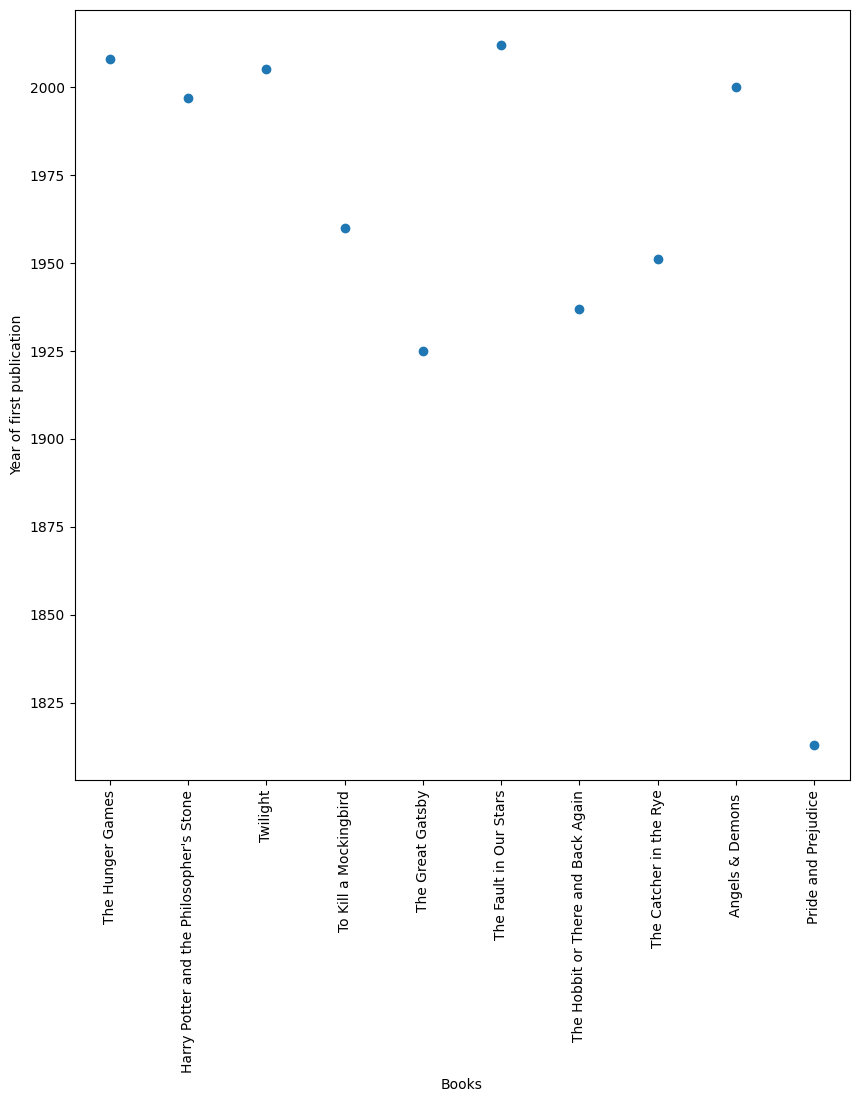

[2008.0, 1997.0, 2005.0, 1960.0, 1925.0, 2012.0, 1937.0, 1951.0, 2000.0, 1813.0]
*************************
   book_id              authors  original_publication_year  \
0        1      Suzanne Collins                     2008.0   
1        2         J.K. Rowling                     1997.0   
2        3      Stephenie Meyer                     2005.0   
3        4           Harper Lee                     1960.0   
4        5  F. Scott Fitzgerald                     1925.0   
5        6           John Green                     2012.0   
6        7       J.R.R. Tolkien                     1937.0   
7        8        J.D. Salinger                     1951.0   
8        9            Dan Brown                     2000.0   
9       10          Jane Austen                     1813.0   

                             original_title language_code  average_rating  \
0                          The Hunger Games           eng            4.34   
1  Harry Potter and the Philosopher's Stone           en

In [233]:
pop_ratings_books_df = books_df.query("ratings_count > 2000000")

s_array1 = list(pop_ratings_books_df["original_title"].to_numpy())
s_array2 = list(pop_ratings_books_df["original_publication_year"].to_numpy())


plt.figure(figsize=(10,10))

plt.scatter(s_array1, s_array2)
plt.xticks(rotation=90) 
plt.xlabel("Books")
plt.ylabel("Year of first publication")
plt.show()
print(s_array2)

print("*"*25)
print(pop_ratings_books_df)

The books having number of ratings more than 20 lakhs i.e. the most popular books, most books are from the 20th century or later except for 'Pride and Prejudice' which was first published in 1813. This means that the general population prefers to read the recently released books.  

Books having more than 4 star reviews vs. no. of ratings

Are average ratings a good measure of quality of books?

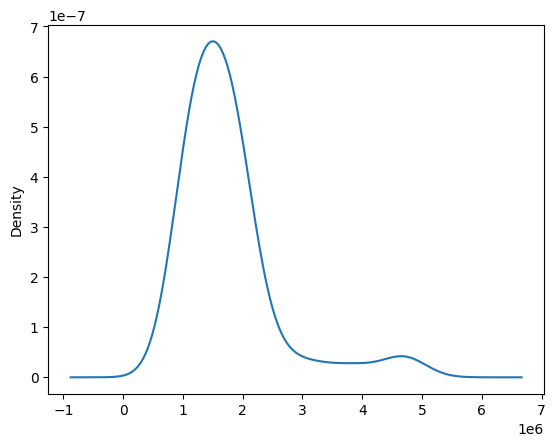

In [220]:

good_measure = books_df.query("ratings_count > 1000000")

#good_measure["ratings_count"].plot.kde()
#books_df["average_rating"].plot.kde()
good_measure["ratings_count"].plot.kde()
#books_df.plot.kde()
plt.show()

In [226]:
import seaborn as sns



In [230]:
good_measure = books_df.query("average_rating > 4")
x = good_measure.ratings_count
y = good_measure.average_rating

sns.kdeplot(x,y)


TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given